In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import json

# Loading Data

In [2]:
file_path = 'D:/Datasets/yelp_academic_dataset_business.json'

with open(file_path, encoding='utf-8') as f:  
    data = [json.loads(line) for line in f]

In [3]:
import warnings
warnings.simplefilter(action='ignore', category='SettingWithCopyWarning')
# Suppress all warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [4]:
df_business = pd.DataFrame(data)

# Showing First 5 Rows of Data

In [5]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


# Information about attribute column

In [6]:
df_business['attributes']

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

# Splitting the Attributes

In [7]:
# the attribute column has nested attributes, some only have bool value, the others have dictionaries as the inner value
# split the attribute
def nested_atrributes(attributes):
    row = attributes.shape[0]
    single_attributes = []
    for i in range(row):
        if isinstance(df_business.at[i,'attributes'], dict):
            for key in df_business['attributes'][i]:
                if df_business['attributes'][i][key] == 'True' or df_business['attributes'][i][key] == 'False':
                    if key not in single_attributes:
                        single_attributes.append(key)
    total_attributes = []
    for i in range(row):
        if isinstance(df_business.at[i,'attributes'], dict):
            for key in df_business['attributes'][i]:
                if key not in total_attributes:
                    total_attributes.append(key)
    nested_attr = []
    for attr in total_attributes:
        if attr not in single_attributes:
            nested_attr.append(attr)
    return nested_attr

In [8]:
nested_attr = nested_atrributes(df_business['attributes'])

In [9]:
nested_attr

['RestaurantsPriceRange2',
 'WiFi',
 'BusinessParking',
 'Alcohol',
 'RestaurantsAttire',
 'Ambience',
 'NoiseLevel',
 'GoodForMeal',
 'Smoking',
 'Music',
 'BestNights',
 'BYOBCorkage',
 'HairSpecializesIn',
 'AgesAllowed',
 'DietaryRestrictions']

In [10]:
# check if there is a wifi
def has_wife(attr, row):
    if attr == 'WiFi':
        if 'free' in row[attr]:
            row[attr] = 'True'
        elif 'no' in row[attr]:
            row[attr] = 'False' 

In [11]:
# check if there is a bussinessparking, and transform the dict value to bool
def has_businessparking(attr, row):
    attr_dic = ast.literal_eval(row[attr])
    if attr_dic is not None:
        for loc in attr_dic:
            if attr_dic[loc] is True:
                row[attr] = 'True'
            if row[attr] != True:
                row[attr] = 'False'

In [12]:
# check if there has music
def has_music(attr, row):
    attr_dic = ast.literal_eval(row[attr])
    if attr_dic is not None:
        for e in attr_dic:
            if attr_dic[e] is True:
                row[attr] = 'True'
            if row[attr] != True:
                row[attr] = 'False'

In [13]:
row = df_business.shape[0]
for i in range(row):
    if isinstance(df_business.at[i,'attributes'], dict):
        for key in df_business['attributes'][i]:
            if key == 'BusinessParking':
                has_businessparking(key, df_business['attributes'][i]) 
            elif key == 'WiFi':
                has_wife(key, df_business['attributes'][i])
            elif key == 'Music':
                has_music(key, df_business['attributes'][i])

In [14]:
row = df_business.shape[0]
single_attributes = []
for i in range(row):
    if isinstance(df_business.at[i,'attributes'], dict):
        for key in df_business['attributes'][i]:
            if df_business['attributes'][i][key] == 'True' or df_business['attributes'][i][key] == 'False':
                if key not in single_attributes:
                    single_attributes.append(key)

In [15]:
for attr in single_attributes:
    df_business[attr] = False
for i in range(row):
    if isinstance(df_business.at[i,'attributes'], dict):
        for key in df_business['attributes'][i]:
            if key in single_attributes:
                if df_business['attributes'][i][key] == 'True':
                    df_business.loc[i,key] = True               

In [16]:
# extract the feature from nested_attribute_RestaurantsPriceRange2
def update_nested_attribute_RestaurantsPriceRange2(attr,column):
    row = df_business[column].shape[0]
    df_business[attr]= 0
    for i in range(row):
        if isinstance(df_business.at[i,column], dict):
            for key in df_business[column][i]:
                if key == attr:
                    if df_business[column][i][key] != 'None':
                        df_business.loc[i, attr] = float(df_business[column][i][key])                      

In [17]:
update_nested_attribute_RestaurantsPriceRange2('RestaurantsPriceRange2','attributes')

In [18]:
# extract the feature from nested_attribute_Ambience
def update_nested_attribute_Ambience(attr,column):
    Ambience = ['romantic', 'intimate', 'touristy', 'hipster', 'divey', 'classy', 'trendy', 'upscale', 'casual']
    row = df_business[column].shape[0]
    for c in Ambience:
        df_business[c] = False
    for i in range(row):
        if isinstance(df_business.at[i,column], dict):
            for key in df_business[column][i]:
                if key == attr:
                    attr_dic = ast.literal_eval(df_business[column][i][key])
                    if attr_dic is not None:
                        for e in attr_dic:
                            if attr_dic[e] is True:
                                df_business.loc[i, e] = True

In [19]:
update_nested_attribute_Ambience('Ambience','attributes')

In [20]:
Ambience = ['romantic', 'intimate', 'touristy', 'hipster', 'divey', 'classy', 'trendy', 'upscale', 'casual']
df_business[Ambience].value_counts()

romantic  intimate  touristy  hipster  divey  classy  trendy  upscale  casual
False     False     False     False    False  False   False   False    False     123849
                                                                       True       16041
                                              True    False   False    False       2420
                                                                       True        1969
                                       True   False   False   False    False        888
                                                                                  ...  
True      False     False     True     False  True    True    True     True           1
                                       True   False   True    False    True           1
                    True      False    False  False   False   False    False          1
                                              True    False   False    True           1
          True      True      True     Fal

In [21]:
# extract the feature from nested_attribute_GoodForMeal
def update_nested_attribute_GoodForMeal(attr,column):
    row = df_business[column].shape[0]
    meal = ['dessert','latenight','lunch','dinner','brunch','breakfast']
    for c in meal:
        df_business[c] = False
    for i in range(row):
        if isinstance(df_business.at[i,column], dict):
            for key in df_business[column][i]:
                if key == attr:
                    attr_dic = ast.literal_eval(df_business[column][i][key])
                    if attr_dic is not None:
                        for e in attr_dic:
                            if attr_dic[e] is True:
                                df_business.loc[i, e] = True

In [22]:
update_nested_attribute_GoodForMeal('GoodForMeal','attributes')

In [23]:
df_business.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,classy,trendy,upscale,casual,dessert,latenight,lunch,dinner,brunch,breakfast
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,False,False,False,False,False,False,False,False,False,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,False,False,False,False,False,False,False,False,False,False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,False,False,False,False,False,False,False,False,False,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,False,False,False,False,False,False,False,False,False,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,False,False,False,False,False,False,False,False,False,False


In [24]:
meal = ['dessert','latenight','lunch','dinner','brunch','breakfast']
df_business[meal].value_counts()

dessert  latenight  lunch  dinner  brunch  breakfast
False    False      False  False   False   False        130748
                    True   True    False   False          7207
                    False  True    False   False          3084
                    True   False   False   False          2951
                                   True    True           1027
                                                         ...  
True     True       False  False   True    False             2
                    True   False   True    False             2
False    True       True   False   True    False             2
True     True       False  False   False   True              1
                                   True    True              1
Length: 62, dtype: int64

In [25]:
# define the function to uniform the value of 'Alcohol'
def update_nested_attribute_Alcohol(attr,column):
    df_business[attr] = 'no'
    row = df_business[column].shape[0]
    for i in range(row):
        if isinstance(df_business.at[i,column], dict):
            for key in df_business[column][i]:
                if key == attr:
                    if 'none' in df_business[column][i][key]:
                        df_business.loc[i, attr] = 'no'
                    elif 'beer_and_wine' in df_business[column][i][key]:
                        df_business.loc[i, attr] = 'beer_and_wine'
                    elif 'full_bar' in df_business[column][i][key]:
                        df_business.loc[i, attr] = 'full_bar'

In [26]:
# define the function to uniform the value of 'Smoking'
def update_nested_attribute_smoking(attr,column):
    df_business[attr] = 'no'
    row = df_business[column].shape[0]
    for i in range(row):
        if isinstance(df_business.at[i,column], dict):
            for key in df_business[column][i]:
                if key == attr:
                    if 'yes' in df_business[column][i][key]:
                        df_business.loc[i, attr] = 'yes'
                    elif 'outdoor' in df_business[column][i][key]:
                        df_business.loc[i, attr] = 'outdoor'
                    else:
                        df_business.loc[i, attr] = 'no'

In [27]:
update_nested_attribute_smoking('Smoking','attributes')

In [28]:
update_nested_attribute_Alcohol('Alcohol','attributes')

In [29]:
df_business['hours']= df_business['hours'].fillna(' ')

In [30]:
# group the opening hours into various categories
row = df_business['hours'].shape[0]
for i in range(row):
    hours = []
    for key in df_business['hours'][i]:
        hours.append(key)
    df_business.at[i, 'hours'] = hours

In [31]:
df_business['hours'] = df_business['hours'].apply(lambda x: str(x))

# One-hot encoding for Hours

In [32]:
Working_Days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
# Creating one-hot encoding for 'hours' column
for days in Working_Days:
    df_business[days] = 0
for i in range(row):
    for day in Working_Days:
        if day in df_business['hours'][i]:
            df_business.at[i, day] = 1

In [33]:
# group attributes into categories
df_category_split = df_business['categories'].str.split(',', expand=True)[[0,1,2,3]]
# rename the new columns
df_category_split.columns = ['category_0','category_1', 'category_2', 'category_3']

In [34]:
concatenated_values = pd.concat([df_category_split['category_0'], 
                                 df_category_split['category_1'],
                                 df_category_split['category_2'],
                                 df_category_split['category_3']])
# list the top 15 most frequency in the 4 categories
top_20_values = concatenated_values.value_counts().head(20)
top_20_values

 Restaurants                  28783
Restaurants                   15290
 Food                         14793
 Shopping                     12513
 Home Services                 7992
 Beauty & Spas                 7705
Food                           6783
 Health & Medical              6655
 Automotive                    6170
 Nightlife                     5994
 Local Services                5870
Shopping                       5480
 Bars                          5474
 Event Planning & Services     5150
 Sandwiches                    4590
Beauty & Spas                  4385
 American (Traditional)        4213
 Pizza                         4112
 Fast Food                     4048
 Active Life                   3989
dtype: int64

In [35]:
# Group the top categories
top_category=['Restaurants','Food','Shopping','Beauty & Spas','Home Services','Health & Medical','Automotive',
                 'Nightlife','Local Services','Bars','Event Planning & Services','American (Traditional)','Active Life']
print(f'Top category is {top_category}')

Top category is ['Restaurants', 'Food', 'Shopping', 'Beauty & Spas', 'Home Services', 'Health & Medical', 'Automotive', 'Nightlife', 'Local Services', 'Bars', 'Event Planning & Services', 'American (Traditional)', 'Active Life']


# One-hot encoding for Ctaegories

In [36]:
# Creating one-hot encoding for the 'categories' column
for category in top_category:
    df_business[category] = 0

In [37]:
df_business['categories']= df_business['categories'].fillna(' ')

In [38]:
for i in range(row):
    for substring in top_category:
        if substring in df_business['categories'][i]:
            df_business.at[i, substring] = 1

# Dropping unnecessary columns

In [39]:
df_business_clean = df_business.drop(['categories', 'hours', 'attributes'], axis=1)

# Removing Businesses that have been Closed

In [40]:
# filter out the businesses that are already closed
df_business_clean = df_business_clean.loc[df_business_clean['is_open'] == 1]

In [41]:
df_business_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119698 entries, 1 to 150345
Data columns (total 76 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 119698 non-null  object 
 1   name                        119698 non-null  object 
 2   address                     119698 non-null  object 
 3   city                        119698 non-null  object 
 4   state                       119698 non-null  object 
 5   postal_code                 119698 non-null  object 
 6   latitude                    119698 non-null  float64
 7   longitude                   119698 non-null  float64
 8   stars                       119698 non-null  float64
 9   review_count                119698 non-null  int64  
 10  is_open                     119698 non-null  int64  
 11  ByAppointmentOnly           119698 non-null  bool   
 12  BusinessAcceptsCreditCards  119698 non-null  bool   
 13  BikeParking   

In [42]:
df_business_clean = pd.get_dummies(df_business_clean, columns=['Smoking'], prefix='Smoking')

In [43]:
df_business_clean = pd.get_dummies(df_business_clean, columns=['Alcohol'], prefix='Alcohol')

In [44]:
df_business_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119698 entries, 1 to 150345
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 119698 non-null  object 
 1   name                        119698 non-null  object 
 2   address                     119698 non-null  object 
 3   city                        119698 non-null  object 
 4   state                       119698 non-null  object 
 5   postal_code                 119698 non-null  object 
 6   latitude                    119698 non-null  float64
 7   longitude                   119698 non-null  float64
 8   stars                       119698 non-null  float64
 9   review_count                119698 non-null  int64  
 10  is_open                     119698 non-null  int64  
 11  ByAppointmentOnly           119698 non-null  bool   
 12  BusinessAcceptsCreditCards  119698 non-null  bool   
 13  BikeParking   

In [45]:
# transform the object type column using labelencoder()
object_columns = df_business_clean.select_dtypes(include=['object']).columns.tolist()
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()
for col in object_columns:
    df_business_clean[col + '_encoded'] = label_encoder.fit_transform(df_business_clean[col])
    #df_business_clean[col] = label_encoder.fit_transform(df_business_clean[col])

In [46]:
bool_columns = df_business_clean.select_dtypes(include=['bool']).columns.tolist()

In [47]:
df_business_clean[bool_columns]=df_business_clean[bool_columns].astype(int)

# Checking if Any Missing Values Left

In [71]:
# Identify missing values
missing_values = df_business_clean.isna().sum()

In [72]:
missing_values

business_id            0
name                   0
address                0
city                   0
state                  0
                      ..
name_encoded           0
address_encoded        0
city_encoded           0
state_encoded          0
postal_code_encoded    0
Length: 86, dtype: int64

# Descriptive Statistics

In [73]:
# Descriptive statistics for numerical features
numerical_stats = df_business_clean.describe()
print(numerical_stats)

            latitude      longitude          stars   review_count   is_open  \
count  119698.000000  119698.000000  119698.000000  119698.000000  119698.0   
mean       36.621462     -89.465100       3.618908      46.683963       1.0   
std         5.884282      14.972608       0.996255     130.820262       0.0   
min        27.555127    -120.095137       1.000000       5.000000       1.0   
25%        32.155485     -90.375396       3.000000       8.000000       1.0   
50%        38.766894     -86.118252       4.000000      15.000000       1.0   
75%        39.954783     -75.457406       4.500000      37.000000       1.0   
max        53.679197     -73.200457       5.000000    7568.000000       1.0   

       ByAppointmentOnly  BusinessAcceptsCreditCards    BikeParking  \
count      119698.000000               119698.000000  119698.000000   
mean            0.119091                    0.737088       0.354417   
std             0.323897                    0.440217       0.478338   
min 

# Showing the Cleaned Dataset

In [48]:
# show the cleaned bussiness dataset
df_business_clean

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Smoking_yes,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_no,business_id_encoded,name_encoded,address_encoded,city_encoded,state_encoded,postal_code_encoded
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,1,94971,81906,98814,5,13,865
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,1,43860,73621,102520,802,16,260
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,1,94366,59703,2428,397,16,130
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,1,25032,72302,82344,27,18,621
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,...,0,0,0,1,96341,27876,98191,105,13,885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,0,0,0,1,36522,10016,55255,292,0,2629
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,0,0,0,1,74828,88854,47334,690,18,663
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,...,0,0,0,1,69846,17686,81129,472,9,761
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,0,0,0,1,95063,20987,42541,295,8,782


# Saving New File

In [49]:
folder_path = r'D:\Datasets'

# Specify the file name
final_file = 'yelp_dataset_business_clean_withoriginalfeature.csv'

final_path = os.path.join(folder_path, final_file)

df_business_clean.to_csv(final_path, index=False)

# Testing

In [50]:
# test the cleaned dataset by filtering
condition = (df_business_clean['Restaurants'] == 1) & (df_business_clean['state'] == 'CA')
result = df_business_clean[condition].sort_values(by=['review_count','stars'], ascending=[False, False])[['name', 'review_count', 'stars']].head(10)

In [51]:
# show the result after the filtering
result

,name,review_count,stars
129349,Los Agaves,3834,4.5
41952,Brophy Bros - Santa Barbara,2940,4.0
139786,Boathouse at Hendry's Beach,2536,4.0
141,Santa Barbara Shellfish Company,2404,4.0
145143,Mesa Verde,1796,4.5
25270,La Super-Rica Taqueria,1759,4.0
21881,Sandbar,1546,3.5
125844,The Lark,1520,4.0
100376,The Palace Grill,1500,4.5
85427,Lure Fish House,1453,4.5


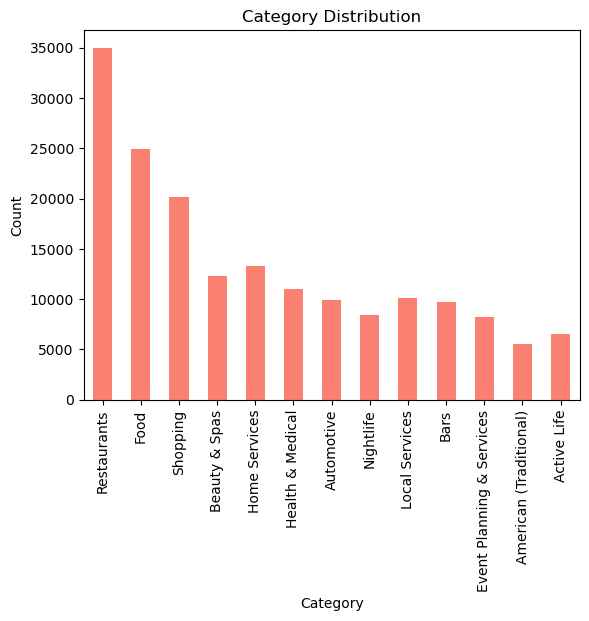

In [52]:
counts = {}
for category in top_category:
    counts[category] = df_business_clean[category][df_business_clean[category]==1].shape[0]
data_series = pd.Series(counts)
data_series.plot(kind='bar', color='salmon')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

In [53]:
# the counts for each category 
counts

{'Restaurants': 34987,
 'Food': 24948,
 'Shopping': 20186,
 'Beauty & Spas': 12263,
 'Home Services': 13322,
 'Health & Medical': 11046,
 'Automotive': 9879,
 'Nightlife': 8379,
 'Local Services': 10138,
 'Bars': 9759,
 'Event Planning & Services': 8173,
 'American (Traditional)': 5531,
 'Active Life': 6496}

In [54]:
import folium
from folium.plugins import MarkerCluster

In [55]:
# show the business distribution worldwide
city_counts = df_business_clean[df_business_clean['Restaurants']== 1]['city'].value_counts()

# Create a map centered at a specific location
map_center = [df_business_clean['latitude'].mean(), df_business_clean['longitude'].mean()]  # Use mean coordinates for center

yelp_restaurants_map = folium.Map(location=map_center, zoom_start=10)

# Marker cluster for better visualization of dense areas
marker_cluster = MarkerCluster().add_to(yelp_restaurants_map)

# Add markers for each city
for city, count in city_counts.items():
    city_data = df_business_clean[df_business_clean['city'] == city]
    city_center = [city_data['latitude'].mean(), city_data['longitude'].mean()]  # Use mean coordinates for city center
    folium.Marker(location=city_center, popup=f"{city}: {count} restaurants").add_to(marker_cluster)

In [56]:
# save the map to the local 
yelp_restaurants_map.save('my_restaurant_map.html')

In [57]:
df_star=df_business_clean[['name','stars','review_count',]+top_category]

In [58]:
df_star_reset = df_star.reset_index(drop=True)

In [59]:
# create a new column named category, which represents the primary category
df_star_reset['category'] = 'other'

In [60]:
top_5_categories = ['Restaurants','Food','Shopping','Beauty & Spas','Health & Medical']
for i in range(df_star_reset['category'].shape[0]):
    for category in top_5_categories:   
        if df_star_reset[category].iloc[i] == 1:
            df_star_reset.loc[i,'category'] = category
            break

In [61]:
df_star_review = df_star_reset[['stars','review_count','category']]

In [62]:
df_star_review

,stars,review_count,category
0,3.0,15,other
1,4.0,80,Restaurants
2,4.5,13,Food
3,2.0,6,Restaurants
4,2.5,13,Shopping
...,...,...,...
119693,3.0,13,Beauty & Spas
119694,4.0,5,Shopping
119695,3.5,8,Shopping
119696,4.0,24,Shopping


In [63]:
df_star_review['category'].value_counts()

other               40005
Restaurants         34987
Shopping            17304
Beauty & Spas       10519
Food                 9595
Health & Medical     7288
Name: category, dtype: int64

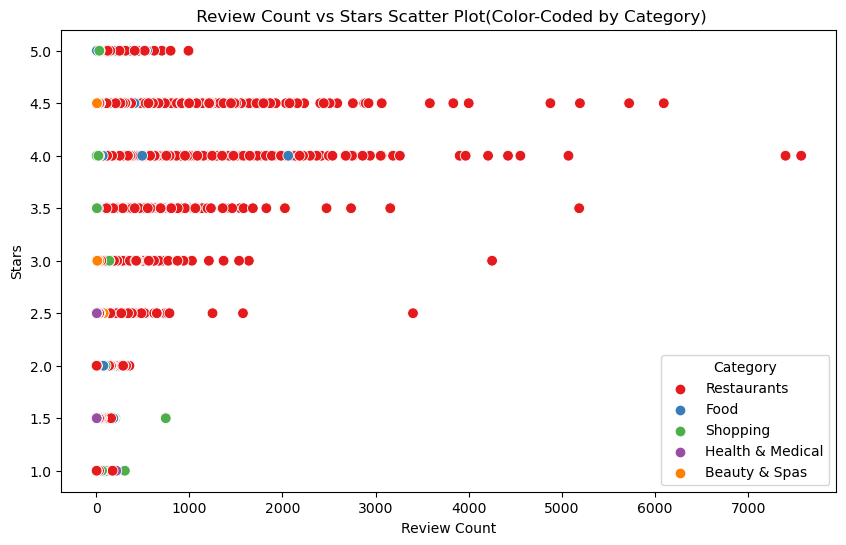

In [64]:
# Scatter plot with Seaborn
plt.figure(figsize=(10, 6))
df_star_review_top_5_categories = df_star_review[df_star_review['category'].isin(top_5_categories)]
sns.scatterplot(x='review_count', y='stars', hue='category', data=df_star_review_top_5_categories, palette="Set1", s=60)


# Set axis labels and title
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.title(' Review Count vs Stars Scatter Plot(Color-Coded by Category)')

# Show the legend
plt.legend(title='Category')

# Display the plot
plt.show()